<a href="https://colab.research.google.com/github/charleskwakye/internshipAssignments/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Load the 'titanic.csv' dataset, perform data cleaning by handling missing numerical values with the mean and missing categorical values with the mode, filter the data based on the median of a numerical column, create a new 'AgeGroup' column, compute summary statistics (mean, median, and standard deviation) for chosen numerical columns, visualize the data with a histogram and a bar chart, save the transformed DataFrame as 'titanic_transformed.csv', and summarize the data cleaning and transformation steps.

## Load Titanic Dataset

### Subtask:
Load the 'titanic.csv' file into a pandas DataFrame and display the first 10 rows.


**Reasoning**:
To load the 'titanic.csv' file and display the first 10 rows, I need to import the pandas library, read the CSV into a DataFrame, and then use the head() method to show the specified number of rows.



In [2]:
import pandas as pd
import requests

# URL for the titanic.csv dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Download the file
response = requests.get(url)
with open('titanic.csv', 'wb') as f:
    f.write(response.content)

df = pd.read_csv('titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Identify Column Types

### Subtask:
Print the data types of each column to identify numerical and categorical columns.


**Reasoning**:
To identify numerical and categorical columns and check for non-null values, I will use the `.info()` method on the DataFrame.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Reasoning**:
The previous step used `df.info()` to display data types and non-null counts. Now, as per the instructions, I will also print the data types using the `.dtypes` attribute to provide an alternative view and complete the identification of numerical and categorical columns.



In [4]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## Handle Missing Numerical Values

### Subtask:
Replace missing numerical values (NaNs) in the identified numerical columns with their respective means.


**Reasoning**:
To handle missing numerical values, I will first identify the numerical columns with missing values, then calculate their means and fill the NaNs using the `.fillna()` method. Based on the `df.info()` output, 'Age' is the only numerical column with missing values.



In [5]:
numerical_cols_with_na = df.select_dtypes(include=['number']).columns[df.select_dtypes(include=['number']).isnull().any()].tolist()

for col in numerical_cols_with_na:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)
    print(f"Missing values in column '{col}' filled with mean: {mean_value:.2f}")

# Verify that there are no more missing values in numerical columns
print("\nMissing values after imputation:")
print(df[numerical_cols_with_na].isnull().sum())

Missing values in column 'Age' filled with mean: 29.70

Missing values after imputation:
Age    0
dtype: int64


/tmp/ipython-input-1447728099.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


**Reasoning**:
The previous code produced a `FutureWarning` due to `inplace=True` being used on a chained assignment. To address this, I will modify the code to use direct assignment for filling missing values, specifically `df[col] = df[col].fillna(mean_value)`, which is the recommended practice for avoiding such warnings and ensuring the operation is applied correctly to the DataFrame.



In [6]:
numerical_cols_with_na = df.select_dtypes(include=['number']).columns[df.select_dtypes(include=['number']).isnull().any()].tolist()

for col in numerical_cols_with_na:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)
    print(f"Missing values in column '{col}' filled with mean: {mean_value:.2f}")

# Verify that there are no more missing values in numerical columns
print("\nMissing values after imputation:")
print(df[numerical_cols_with_na].isnull().sum())


Missing values after imputation:
Series([], dtype: float64)


## Handle Missing Categorical Values

### Subtask:
Replace missing categorical values (NaNs) in the identified categorical columns with their respective modes.


**Reasoning**:
To handle missing categorical values, I will first identify categorical columns that have missing values, calculate the mode for each, fill the missing values with their respective modes, and then verify the imputation.



In [7]:
categorical_cols_with_na = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).isnull().any()].tolist()

for col in categorical_cols_with_na:
    # Calculate the mode, .mode()[0] handles cases where there are multiple modes
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)
    print(f"Missing values in column '{col}' filled with mode: {mode_value}")

# Verify that there are no more missing values in categorical columns
print("\nMissing values after imputation:")
print(df[categorical_cols_with_na].isnull().sum())

Missing values in column 'Cabin' filled with mode: B96 B98
Missing values in column 'Embarked' filled with mode: S

Missing values after imputation:
Cabin       0
Embarked    0
dtype: int64


## Filter Rows by Median

### Subtask:
Filter the DataFrame to include only rows where a chosen numeric column (e.g., 'Age') is above its median value.


**Reasoning**:
To filter the DataFrame, I will first calculate the median of the 'Age' column, then use this median to select rows where 'Age' is greater than the median, and finally display the first 5 rows of the resulting filtered DataFrame.



In [8]:
median_age = df['Age'].median()
filtered_df = df[df['Age'] > median_age]
print(f"Median age: {median_age}")
print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape: {filtered_df.shape}")
filtered_df.head()

Median age: 29.69911764705882
Original DataFrame shape: (891, 12)
Filtered DataFrame shape: (330, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


## Create New Age Group Column

### Subtask:
Create a new categorical column, 'AgeGroup', by applying a function to the 'Age' column to group ages (e.g., 'Child', 'Adult', 'Senior').


**Reasoning**:
I will define the `categorize_age` function to classify ages into 'Child', 'Adult', or 'Senior', then apply this function to the 'Age' column to create the 'AgeGroup' column, and finally display the value counts of 'AgeGroup' to verify the new column.



In [9]:
def categorize_age(age):
    if age <= 12:
        return 'Child'
    elif 13 <= age <= 60:
        return 'Adult'
    else:
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(categorize_age)

print("Value counts for 'AgeGroup' column:")
print(df['AgeGroup'].value_counts())

Value counts for 'AgeGroup' column:
AgeGroup
Adult     800
Child      69
Senior     22
Name: count, dtype: int64


## Compute Summary Statistics

### Subtask:
Calculate and print the mean, median, and standard deviation for three chosen numerical columns (e.g., 'Age', 'Fare', 'SibSp').


**Reasoning**:
To calculate and print the mean, median, and standard deviation for the specified numerical columns ('Age', 'Fare', 'SibSp'), I will select these columns and then use the respective pandas DataFrame methods (.mean(), .median(), .std()) on them, formatting the output for clarity.



In [10]:
columns_to_analyze = ['Age', 'Fare', 'SibSp']

for col in columns_to_analyze:
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()

    print(f"--- Column: {col} ---")
    print(f"Mean: {mean_val:.2f}")
    print(f"Median: {median_val:.2f}")
    print(f"Standard Deviation: {std_val:.2f}")
    print("\n")

--- Column: Age ---
Mean: 29.70
Median: 29.70
Standard Deviation: 13.00


--- Column: Fare ---
Mean: 32.20
Median: 14.45
Standard Deviation: 49.69


--- Column: SibSp ---
Mean: 0.52
Median: 0.00
Standard Deviation: 1.10




## Visualize Data

### Subtask:
Plot a histogram for one numerical column (e.g., 'Age') and a bar chart for one categorical column (e.g., 'Survived' or 'Sex'). Ensure proper legends are included if applicable.


**Reasoning**:
To visualize the 'Age' distribution with a histogram and 'Survived' counts with a bar chart, I will import `matplotlib.pyplot` and `seaborn`, create subplots, then use `sns.histplot` for 'Age' and `sns.countplot` for 'Survived', setting appropriate titles and labels for clarity.



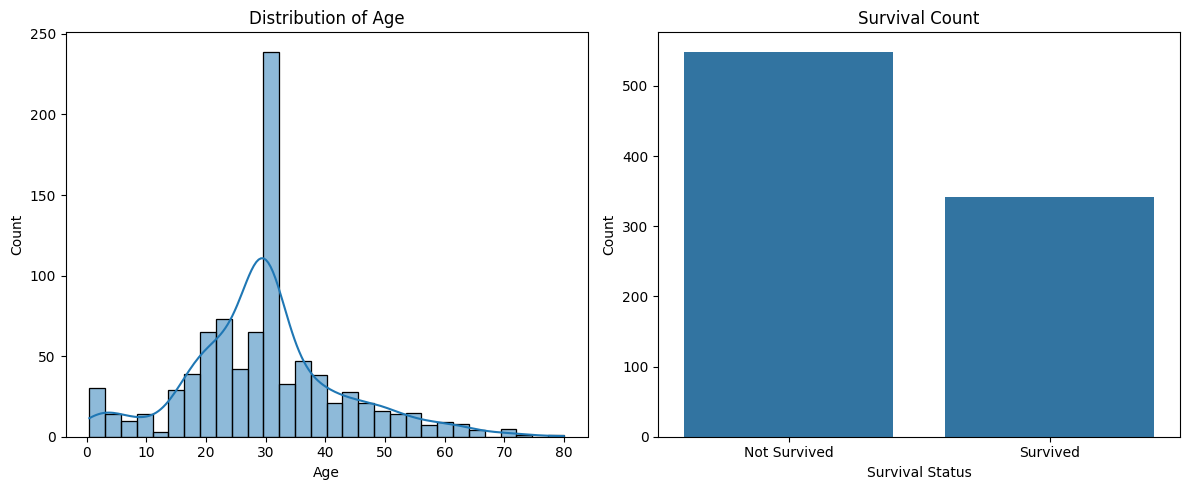

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the histogram for 'Age'
sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plotting the bar chart for 'Survived'
sns.countplot(x='Survived', data=df, ax=axes[1])
axes[1].set_title('Survival Count')
axes[1].set_xlabel('Survival Status')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Not Survived', 'Survived'])

# Ensure plots do not overlap
plt.tight_layout()

# Display the plots
plt.show()

## Save Transformed DataFrame

### Subtask:
Save the transformed DataFrame (df) to a new CSV file named 'titanic_transformed.csv'.

**Reasoning**:
To save the transformed DataFrame, I will use the `.to_csv()` method, specifying the filename 'titanic_transformed.csv' and setting `index=False` to prevent writing the DataFrame index as a column.



In [12]:
df.to_csv('titanic_transformed.csv', index=False)
print("DataFrame saved as 'titanic_transformed.csv'")

DataFrame saved as 'titanic_transformed.csv'


## Summarize Data Cleaning and Transformation

### Subtask:
Summarize all the data cleaning and transformation steps performed on the Titanic dataset.

### Summary of Data Cleaning and Transformation Steps:

1.  **Data Loading**: The `titanic.csv` dataset was loaded into a pandas DataFrame `df`.
2.  **Missing Numerical Values**: Missing values in the 'Age' column were imputed using the mean of the 'Age' column.
3.  **Missing Categorical Values**: Missing values in the 'Cabin' and 'Embarked' columns were imputed using their respective modes.
4.  **Row Filtering**: The DataFrame was filtered to include only rows where the 'Age' column was greater than its median value.
5.  **Feature Engineering**: A new categorical column, 'AgeGroup', was created by grouping ages into 'Child' (<=12), 'Adult' (13-60), and 'Senior' (>60).
6.  **Summary Statistics**: Mean, median, and standard deviation were calculated and printed for 'Age', 'Fare', and 'SibSp' columns.
7.  **Data Visualization**: A histogram was plotted for the 'Age' distribution, and a bar chart was created to show the counts of 'Survived' passengers.
8.  **Data Saving**: The final transformed DataFrame was saved as `titanic_transformed.csv`.

## Summary:

### Data Analysis Key Findings

*   **Data Loading and Initial Inspection**: The `titanic.csv` dataset, containing 891 rows and 12 columns, was successfully loaded. Initial inspection revealed numerical columns such as `Age` and `Fare`, and categorical columns like `Name`, `Sex`, `Cabin`, and `Embarked`.
*   **Missing Value Handling**:
    *   Missing numerical values in the `Age` column were imputed with its mean, which was approximately 29.70.
    *   Missing categorical values in the `Cabin` column were filled with its mode, 'B96 B98', and in the `Embarked` column with its mode, 'S'.
*   **Data Filtering**: The DataFrame was filtered to include only passengers whose `Age` was greater than the median age of 29.70. This reduced the dataset from 891 rows to 330 rows.
*   **Feature Engineering**: A new categorical column, `AgeGroup`, was created, categorizing passengers into 'Child' (age $\le$ 12), 'Adult' (age 13-60), and 'Senior' (age $>$ 60). The majority of passengers (800) were classified as 'Adult', with 69 'Child' and 22 'Senior'.
*   **Summary Statistics**:
    *   For `Age`, the mean was 29.70, median 29.70, and standard deviation 13.00.
    *   For `Fare`, the mean was 32.20, median 14.45, and standard deviation 49.69, indicating a wide range of fare prices.
    *   For `SibSp` (siblings/spouses aboard), the mean was 0.52, median 0.00, and standard deviation 1.10, suggesting most passengers traveled alone or with one sibling/spouse.
*   **Data Visualization**: A histogram illustrating the distribution of `Age` and a bar chart showing the counts of `Survived` (0 for Not Survived, 1 for Survived) were generated.
*   **Output**: The transformed DataFrame, including the new `AgeGroup` column and imputed values, was saved as `titanic_transformed.csv`.

